In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

#### a)

In [2]:
### weights, mean and covariances
pi = np.array([0.1, 0.2, 0.5, 0.2]) #weights

mu = np.array([[7, 6], [0, 0], [-1, 4], [5, -2]]) #means

sigma = [
    np.array([[1, 0], [0, 25]]),
    np.array([[1, 0], [0, 1]]),
    np.array([[9, 1], [1, 1]]),
    np.array([[16, -6], [-6, 4]])]

In [8]:
n_samples = 400

In [9]:
def generate_samples(weights, means, covariances, n):
    n_clusters = len(weights)
    data = np.zeros((n, 2))
    cluster_labels = np.zeros(n)
    for i in range(n):
        k = np.random.choice(n_clusters, p=weights)
        data[i, :] = np.random.multivariate_normal(means[k], covariances[k])
        cluster_labels[i] = k
    return data, cluster_labels

In [10]:
data, labels = generate_samples(pi, mu, sigma, n_samples)

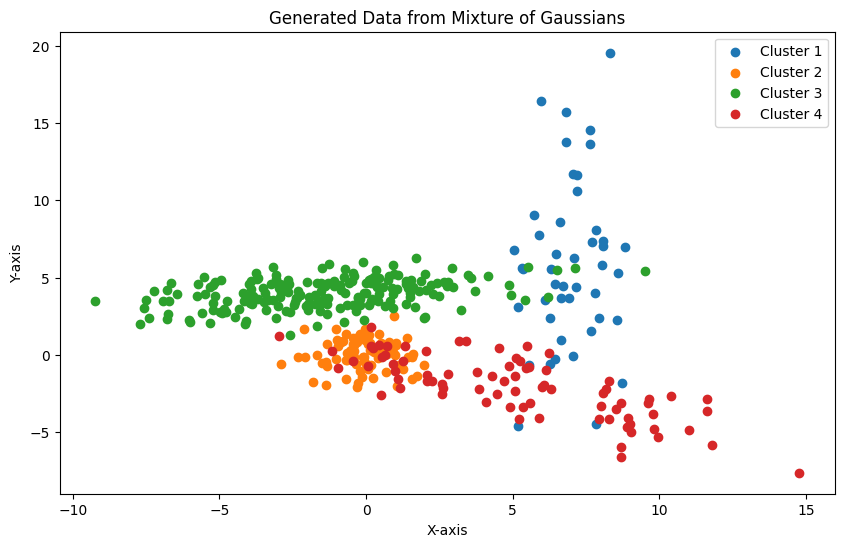

In [11]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.title('Generated Data from Mixture of Gaussians')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

#### b)

In [12]:
def plot_ellipses(ax, means, covariances, color='red'):
    for mu, sigma in zip(means, covariances):
        eigvals, eigvecs = np.linalg.eigh(sigma)
        direction = eigvecs[0] / np.linalg.norm(eigvecs[0])
        theta = np.arctan2(direction[1], direction[0]) * 180 / np.pi + 180
        stretch = 2.0 * np.sqrt(3.0 * eigvals)
        ellipse = Ellipse(mu, stretch[0], stretch[1], angle=theta, color=color)
        ellipse.set_alpha(0.25)
        ax.add_artist(ellipse)


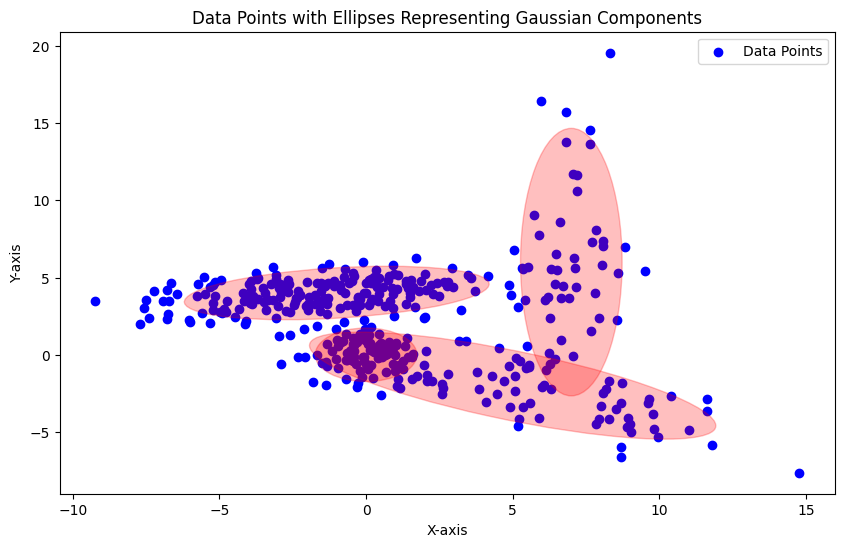

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data Points')
ax = plt.gca()


plot_ellipses(ax, mu, sigma, color='red')
plt.title('Data Points with Ellipses Representing Gaussian Components')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

#### c

Analyzing the first and second graph, we can notice that cluster two , which is small, is contained inside of cluster four. 

#### d

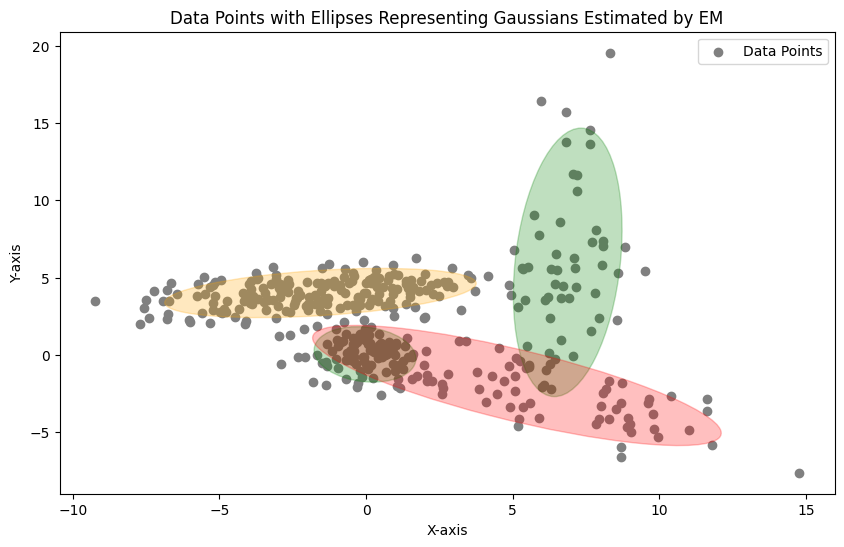

In [18]:
# Running the EM algorithm on the data
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=0, init_params='random')
gmm.fit(data)

em_means = gmm.means_
em_covariances = gmm.covariances_

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], color='grey', label='Data Points')

ax = plt.gca()
for i in range(4):
    plot_ellipses(ax, [em_means[i]], [em_covariances[i]], color=ellipse_colors[i])

plt.title('Data Points with Ellipses Representing Gaussians Estimated by EM')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [19]:
(em_means, em_covariances)


(array([[-0.03485097,  0.02417427],
        [-1.55513384,  3.99993482],
        [ 6.8771775 ,  5.98387878],
        [ 5.14534555, -1.99024591]]),
 array([[[ 1.00368528, -0.16160896],
         [-0.16160896,  1.07354163]],
 
        [[ 9.40518127,  1.10310759],
         [ 1.10310759,  0.84691418]],
 
        [[ 1.14491171,  1.30283099],
         [ 1.30283099, 25.18690476]],
 
        [[16.18172663, -7.15821688],
         [-7.15821688,  5.04382599]]]))

#### e)

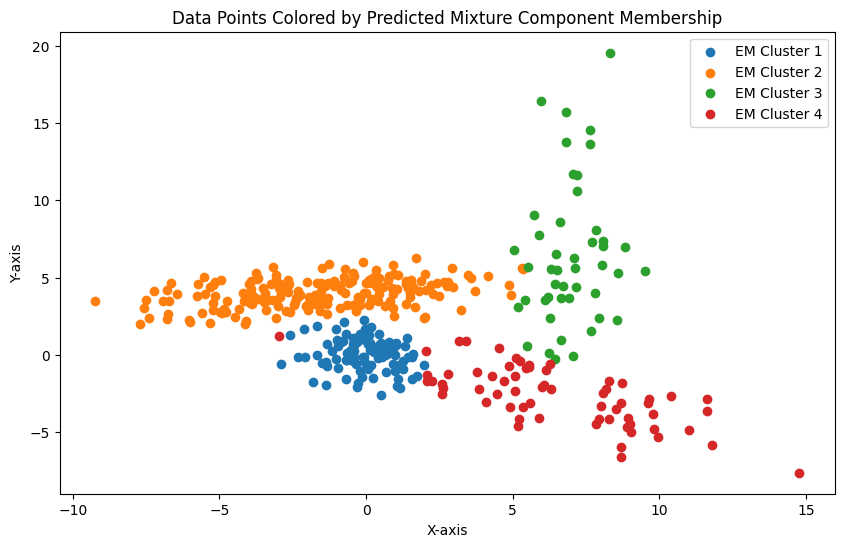

In [28]:
cluster_labels_em = gmm.predict(data)

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.scatter(data[cluster_labels_em == i, 0], data[cluster_labels_em == i, 1], 
                label=f'EM Cluster {i+1}')

plt.title('Data Points Colored by Predicted Mixture Component Membership')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [29]:
true_labels = labels
predicted_labels = cluster_labels_em

true_labels, predicted_labels

(array([2., 2., 2., 2., 2., 2., 1., 1., 3., 0., 2., 1., 1., 2., 1., 3., 1.,
        2., 1., 1., 2., 2., 1., 3., 3., 3., 2., 3., 2., 3., 2., 2., 2., 2.,
        2., 0., 2., 2., 1., 2., 2., 3., 3., 2., 2., 0., 1., 2., 2., 3., 1.,
        1., 3., 1., 2., 2., 2., 0., 3., 3., 2., 2., 2., 2., 2., 2., 2., 1.,
        1., 1., 1., 0., 2., 2., 2., 2., 2., 2., 1., 2., 3., 2., 0., 3., 1.,
        2., 0., 3., 1., 2., 3., 1., 2., 3., 2., 0., 2., 3., 2., 2., 2., 0.,
        2., 2., 1., 2., 2., 2., 1., 0., 2., 2., 0., 2., 2., 3., 3., 2., 2.,
        3., 1., 3., 3., 1., 2., 2., 1., 2., 3., 0., 1., 2., 1., 2., 2., 1.,
        2., 2., 3., 2., 3., 1., 3., 0., 2., 1., 0., 0., 1., 2., 2., 2., 1.,
        2., 3., 0., 2., 1., 2., 1., 2., 1., 3., 1., 2., 2., 3., 0., 2., 2.,
        2., 2., 3., 1., 1., 0., 2., 2., 3., 2., 2., 1., 0., 3., 0., 3., 2.,
        1., 1., 3., 1., 0., 2., 1., 1., 2., 2., 0., 3., 1., 3., 2., 0., 3.,
        2., 2., 2., 1., 2., 2., 2., 2., 2., 3., 2., 3., 2., 3., 2., 2., 3.,
        0., 

##### The difference is that the points are more seperated in clusters compared to part a. There is a point-red- from cluster 4 that seems to belong more to cluster 1 - shown in blue- but besides this point, they all seem to be more properly seperated into clusters. 

#### f)

In [37]:
def fit_plot_gmm(data, n_iterations, initial_params=None):
    gmm = GaussianMixture(n_components=4, covariance_type='full', max_iter=n_iterations,
                          random_state=0, init_params='random', warm_start=True)
    
    if initial_params:
        gmm.means_init, gmm.covariances_init, gmm.weights_init = initial_params
    
    gmm.fit(data)
    means = gmm.means_
    covariances = gmm.covariances_
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], color='grey', label='Data Points')
    ax = plt.gca()
    for i in range(4):
        plot_ellipses(ax, [means[i]], [covariances[i]], color=ellipse_colors[i])
    plt.title(f'EM Iteration {n_iterations}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()
    
    return means, covariances, gmm.weights_

/Users/marlenearredondo/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


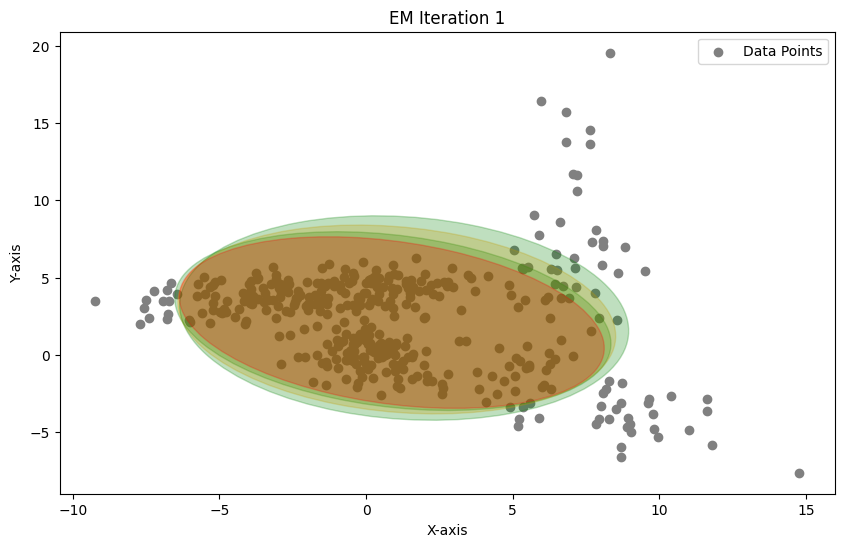

/Users/marlenearredondo/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


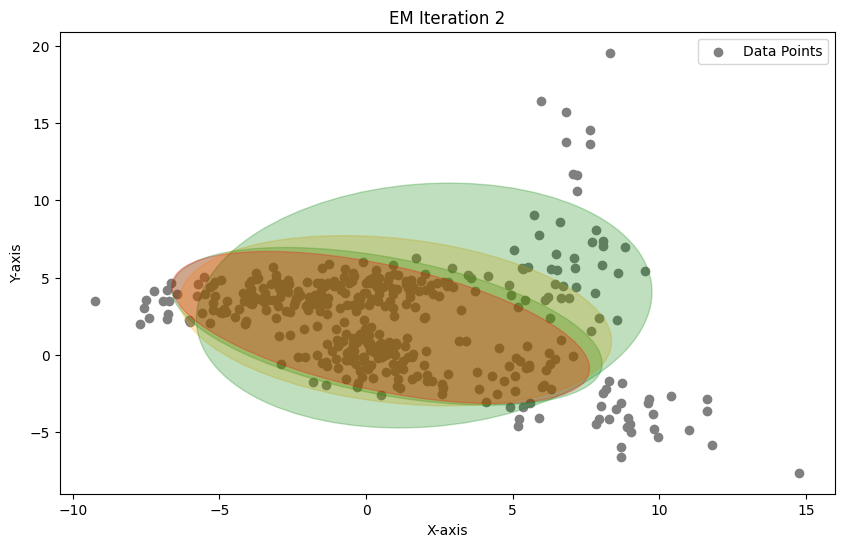

/Users/marlenearredondo/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


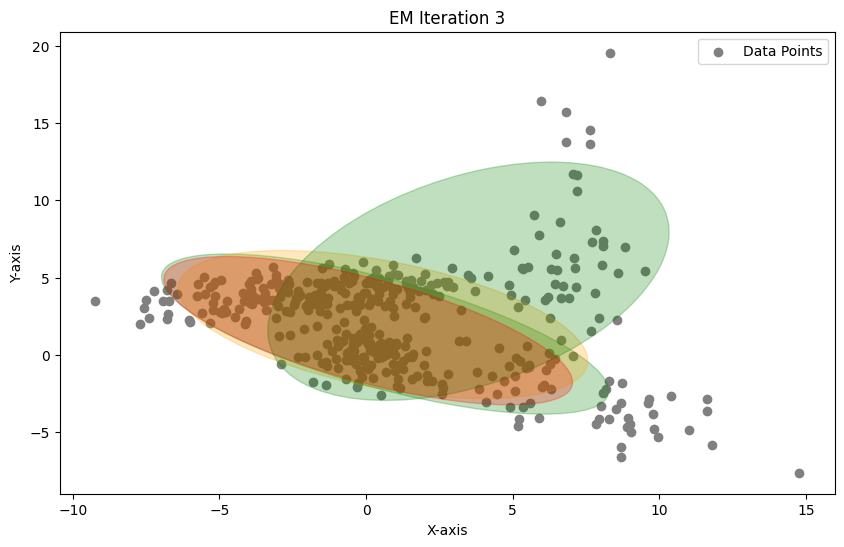

/Users/marlenearredondo/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


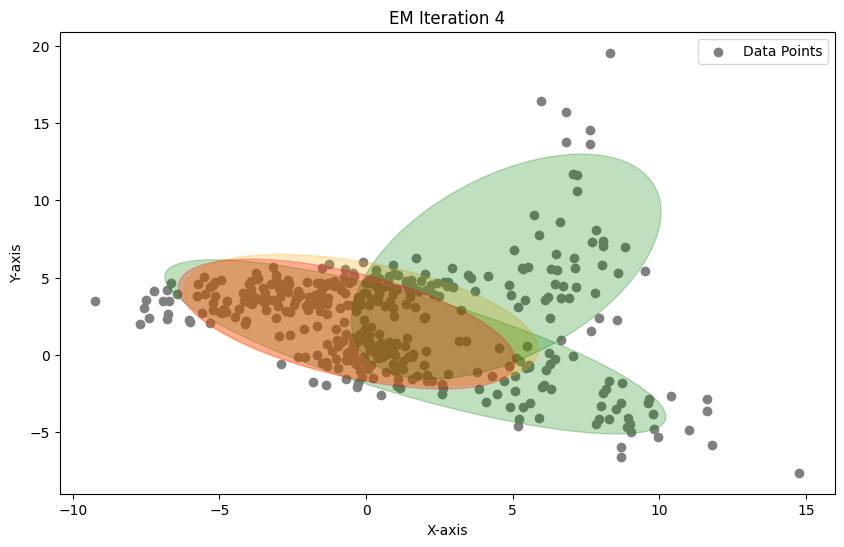

In [38]:
initial_means, initial_covariances, initial_weights = None, None, None
for iteration in range(1, 5):
    initial_means, initial_covariances, initial_weights = fit_plot_gmm(
        data, iteration, (initial_means, initial_covariances, initial_weights)
    )